#2
##2.1
Usamos lo que vimos en el pizarrón:

$E(w_T(b)) = (1.05)^T$

##2.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

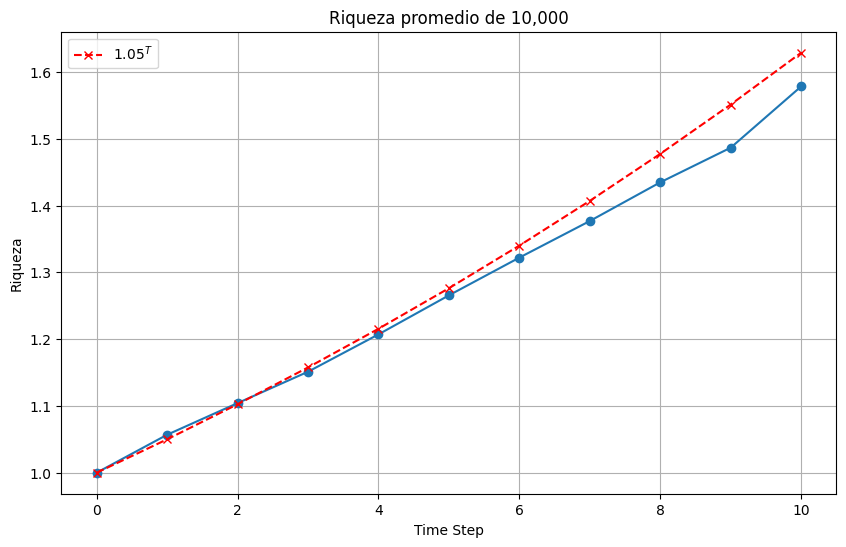

array([1.        , 1.05684   , 1.104201  , 1.1512017 , 1.20713976,
       1.26559406, 1.32209078, 1.3768879 , 1.43482833, 1.48670422,
       1.57844298])

In [ ]:
N = 10000
T = 10
b = 0.5
Q_C = 3.0
Q_S = 1.2


w = np.ones((N, T + 1))


for t in range(1, T + 1):
    bets = np.random.rand(N) < 0.5
    w[:, t] = w[:, t-1] * (b * Q_C * bets + (1 - b) * Q_S * (1 - bets))


average_wealth = w.mean(axis=0)

expected_growth = 1.05 ** np.arange(T + 1)
plt.figure(figsize=(10, 6))
plt.plot(range(T + 1), average_wealth, marker='o')
plt.plot(range(T + 1), expected_growth, marker='x', linestyle='--', color='red', label='$1.05^T$')
plt.xlabel('Time Step')
plt.ylabel('Riqueza')
plt.title('Riqueza promedio de 10,000')
plt.legend()
plt.grid(True)
plt.show()

average_wealth


#2.3

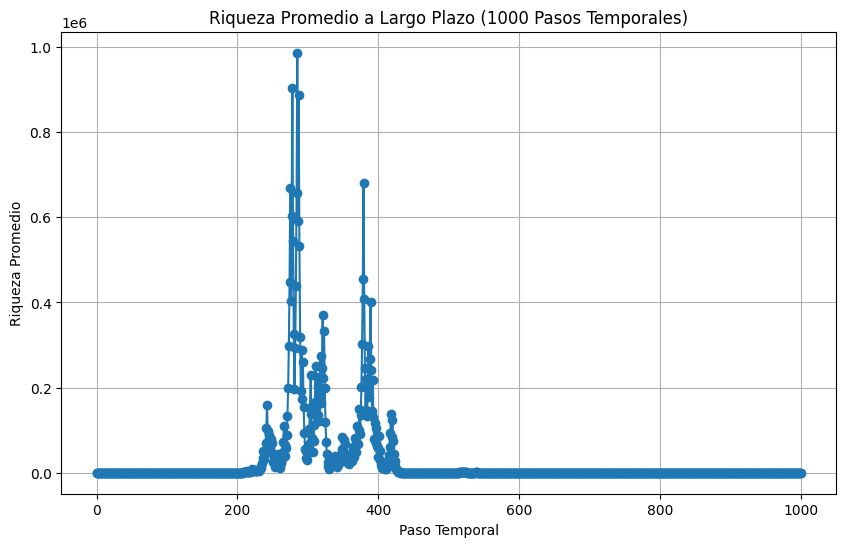

-0.05270600559847872

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 10000
T_long = 1000
b = 0.5
Q_C = 3.0
Q_S = 1.2
w = np.ones((N, T_long + 1))  # Almaceno en cada paso la riqueza de las personas


for t in range(1, T_long + 1):
    bets = np.random.rand(N) < 0.5  # True Cara, False Sello
    w[:, t] = w[:, t-1] * (b * Q_C * bets + (1 - b) * Q_S * (1 - bets))  # Riqueza update

# Tasa de crecimiento logarítmica esperada
log_growth = np.log(w[:, 1:] / w[:, :-1])
average_log_growth = log_growth.mean()


average_wealth_long = w.mean(axis=0)


plt.figure(figsize=(10, 6))
plt.plot(range(T_long + 1), average_wealth_long, marker='o')
plt.xlabel('Paso Temporal')
plt.ylabel('Riqueza Promedio')
plt.title('Riqueza Promedio a Largo Plazo (1000 Pasos Temporales)')
plt.grid(True)
plt.show()

average_log_growth


#2.4

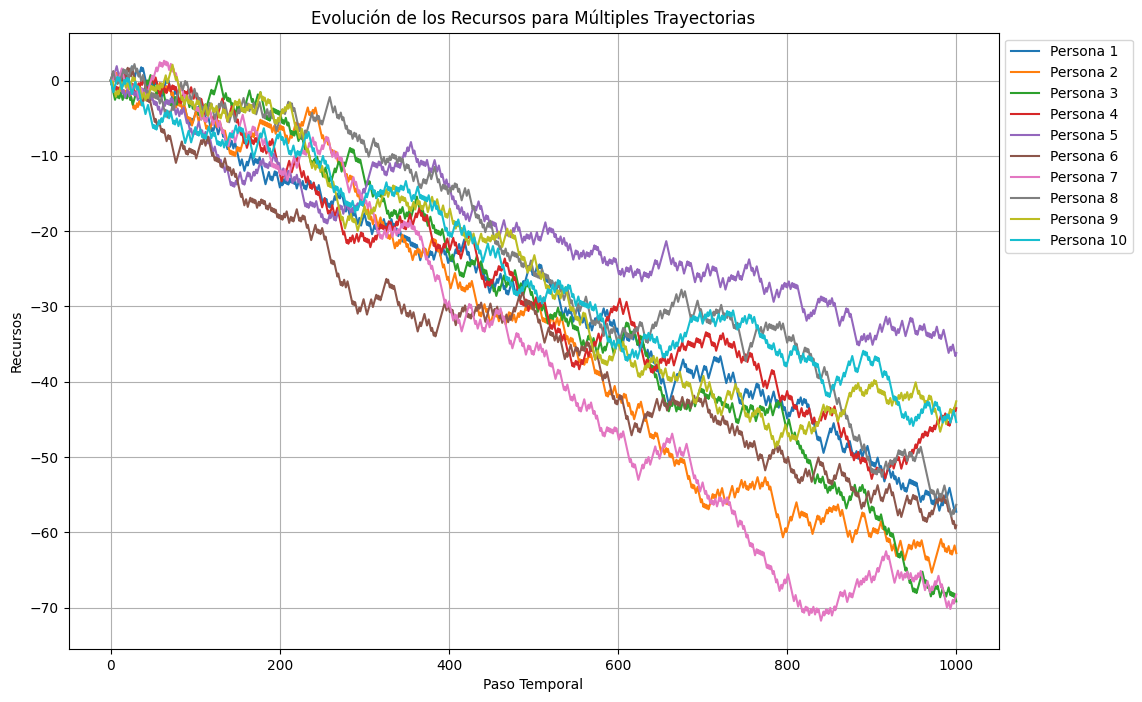

In [ ]:
T = 1000
num_trajectories = 10
b = 0.5
Q_C = 3.0  # Pago por Cara
Q_S = 1.2  # Pago por Sello

# Guardar las trayectorias
trajectories = np.ones((num_trajectories, T + 1))

# Simulación de múltiples trayectorias
for i in range(num_trajectories):
    for t in range(1, T + 1):
        bet = np.random.rand() < 0.5  # True si cae Cara, False si cae Sello
        trajectories[i, t] = trajectories[i, t-1] * (b * Q_C * bet + (1 - b) * Q_S * (1 - bet))

plt.figure(figsize=(12, 8))
for i in range(num_trajectories):
    plt.plot(range(T + 1), np.log(trajectories[i]), label=f'Persona {i + 1}')

plt.xlabel('Paso Temporal')
plt.ylabel('Recursos')
plt.title('Evolución de los Recursos para Múltiples Trayectorias')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


#2.5

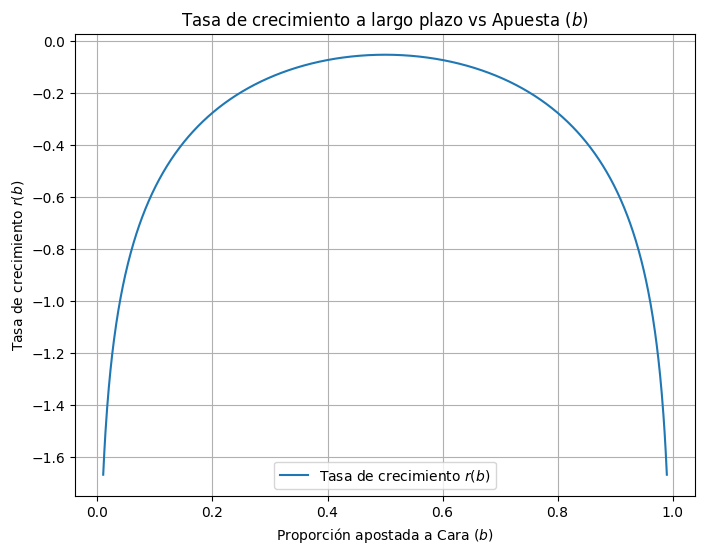

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Qc = 3.0  # Pago Cara
Qs = 1.2  # Pago Sello
pc = 0.5  # Proba de Cara
ps = 1 - pc  # Proba de Sello

# Tasa de crecimiento r(b)
def r(b, Qc, Qs, pc, ps):
    return pc * np.log(b * Qc) + ps * np.log((1 - b) * Qs)

# Grid
b_values = np.linspace(0.01, 0.99, 1000)  # en el 0 y en el 1 se me rompe ni idea

# Calcular la tasa de crecimiento para cada valor de b
r_values = r(b_values, Qc, Qs, pc, ps)


plt.figure(figsize=(8, 6))
plt.plot(b_values, r_values, label='Tasa de crecimiento $r(b)$')
plt.title("Tasa de crecimiento a largo plazo vs Apuesta ($b$)")
plt.xlabel("Proporción apostada a Cara ($b$)")
plt.ylabel("Tasa de crecimiento $r(b)$")
plt.grid(True)
plt.legend()
plt.show()


#2.6

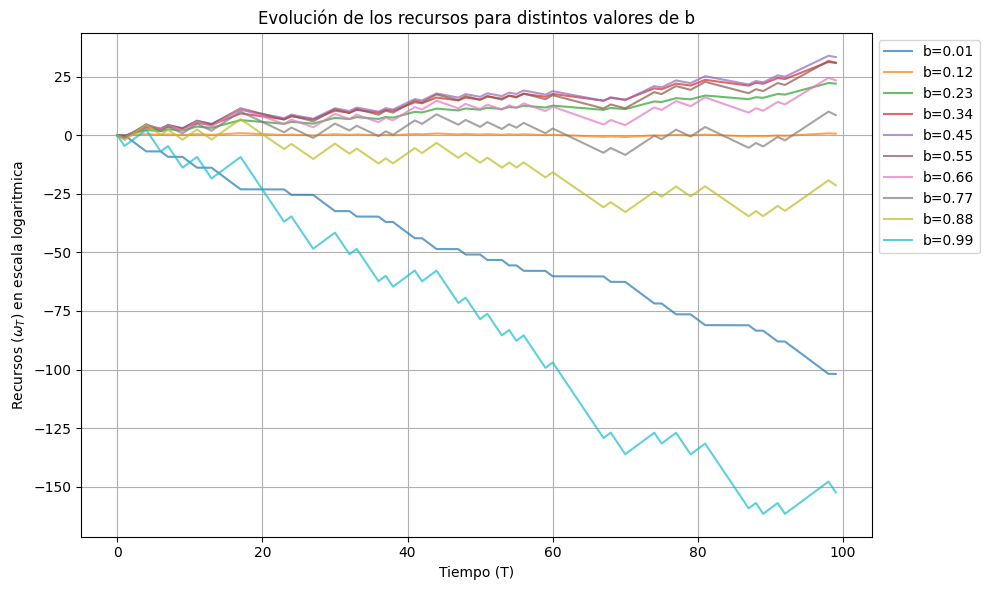

In [ ]:
Qc = 10  # Pago si sale Cara
Qs = 1   # Pago si sale Sello
T = 100
b_values = np.linspace(0.01, 0.99, 10)

# Probabilidades de Cara y Sello
pc = 0.5
ps = 1 - pc

outcomes = np.random.choice([1, 0], size=T, p=[pc, ps])

def calculate_trajectory(b, Qc, Qs, outcomes):
    omega = np.zeros(T)
    omega[0] = 1  # Recursos iniciales normalizados a 1
    for t in range(1, T):
        if outcomes[t-1] == 1:  # Cara
            omega[t] = omega[t-1] * b * Qc
        else:  # Sello
            omega[t] = omega[t-1] * (1 - b) * Qs
    return omega

# Trayectorias para cada valor de b
trajectories = np.array([calculate_trajectory(b, Qc, Qs, outcomes) for b in b_values])

plt.figure(figsize=(10, 6))
for i, b in enumerate(b_values):
    plt.plot(range(T), np.log(trajectories[i]), label=f'b={b:.2f}', alpha=0.7)
plt.title("Evolución de los recursos para distintos valores de b")
plt.xlabel("Tiempo (T)")
plt.ylabel("Recursos ($\omega_T$) en escala logaritmica")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


#2.7

In [ ]:
import numpy as np

# Cociente para dos apuestas b y d, dado Qc y Qs
def resource_ratio(b, d, Qc, Qs, nc, ns):
    return ((b * Qc) / (d * Qc)) ** nc * (((1 - b) * Qs) / ((1 - d) * Qs)) ** ns

b = 0.6
d = 0.4
Qc = 10  # Pago Cara
Qs = 1   # Pago Sello
nc = 50  # Número de Caras observadas
ns = 50  # Número de Sellos observados

ratio = resource_ratio(b, d, Qc, Qs, nc, ns)

print(f'El cociente de recursos entre las apuestas b={b} y d={d} es: {ratio:.4f}')


El cociente de recursos entre las apuestas b=0.6 y d=0.4 es: 1.0000


No depende del pago porque se cancela en la fracción

#2.8

In [ ]:
import numpy as np

# Diferencia de tasas de crecimiento logarítmicas
def log_growth_rate_diff(b, d, Qc, Qs, p):
    term_b = p * np.log(b * Qc) + (1 - p) * np.log((1 - b) * Qs)
    term_d = p * np.log(d * Qc) + (1 - p) * np.log((1 - d) * Qs)
    return term_b - term_d


b = 0.6
d = 0.4
Qc = 10 # Pago Cara
Qs = 1 # Pago Sello
p = 0.5 # Probabilidad de Cara

# Calcular la diferencia de tasas de crecimiento logarítmicas
log_diff = log_growth_rate_diff(b, d, Qc, Qs, p)

print(f'La diferencia en las tasas de crecimiento logarítmicas es: {log_diff:.4f}')


La diferencia en las tasas de crecimiento logarítmicas es: 0.0000


#2.9

El valor óptimo de b que maximiza la tasa de crecimiento es: 0.4828


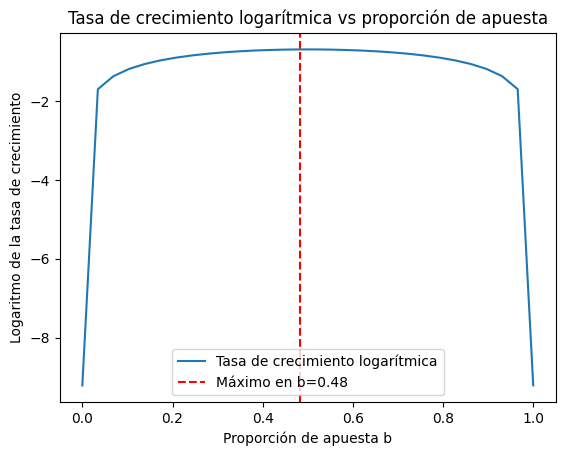

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tasa de crecimiento logarítmica
def log_growth_rate(b, p):
    return p * np.log(b) + (1 - p) * np.log(1 - b)

p = 0.5

b_values = np.linspace(0.00000001, 0.99999999, 30)

log_growth_values = [log_growth_rate(b, p) for b in b_values]
max_index = np.argmax(log_growth_values)
b_optimo = b_values[max_index]


print(f'El valor óptimo de b que maximiza la tasa de crecimiento es: {b_optimo:.4f}')


plt.plot(b_values, log_growth_values, label='Tasa de crecimiento logarítmica')
plt.axvline(x=b_optimo, color='red', linestyle='--', label=f'Máximo en b={b_optimo:.2f}')
plt.xlabel('Proporción de apuesta b')
plt.ylabel('Logaritmo de la tasa de crecimiento')
plt.title('Tasa de crecimiento logarítmica vs proporción de apuesta')
plt.legend()
plt.show()


In [ ]:
b_optimo

0.48275862103448275

#3.1

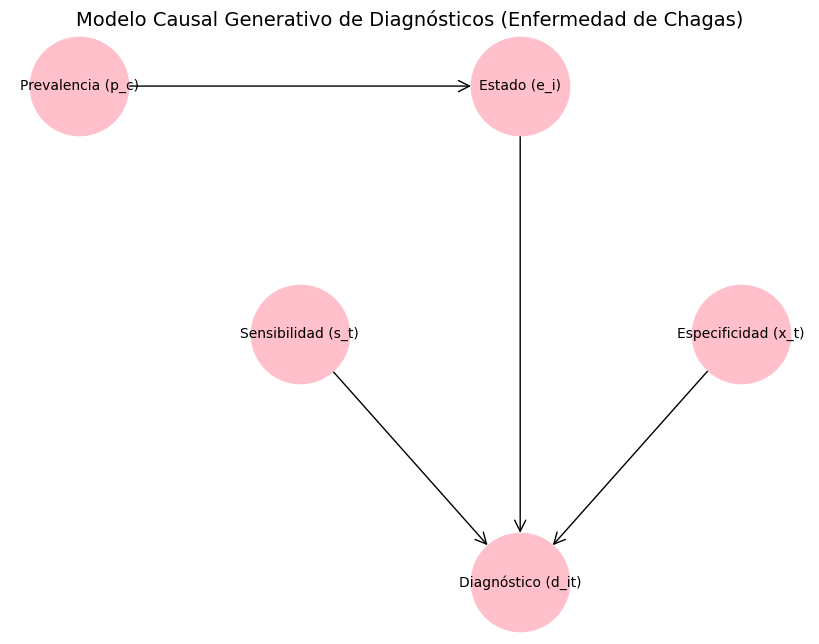

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un gráfico dirigido
G = nx.DiGraph()


G.add_nodes_from(["Prevalencia (p_c)", "Estado (e_i)", "Sensibilidad (s_t)", "Especificidad (x_t)", "Diagnóstico (d_it)"])

G.add_edges_from([("Prevalencia (p_c)", "Estado (e_i)"),
                  ("Estado (e_i)", "Diagnóstico (d_it)"),
                  ("Sensibilidad (s_t)", "Diagnóstico (d_it)"),
                  ("Especificidad (x_t)", "Diagnóstico (d_it)")])

# Posiciones para los nodos
pos = {
    "Prevalencia (p_c)": (0, 1),
    "Estado (e_i)": (2, 1),
    "Sensibilidad (s_t)": (1, 0),
    "Especificidad (x_t)": (3, 0),
    "Diagnóstico (d_it)": (2, -1)
}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="pink", arrowsize=20, arrowstyle='->', font_size=10)

plt.title("Modelo Causal Generativo de Diagnósticos (Enfermedad de Chagas)", size=14)
plt.show()


#3.2

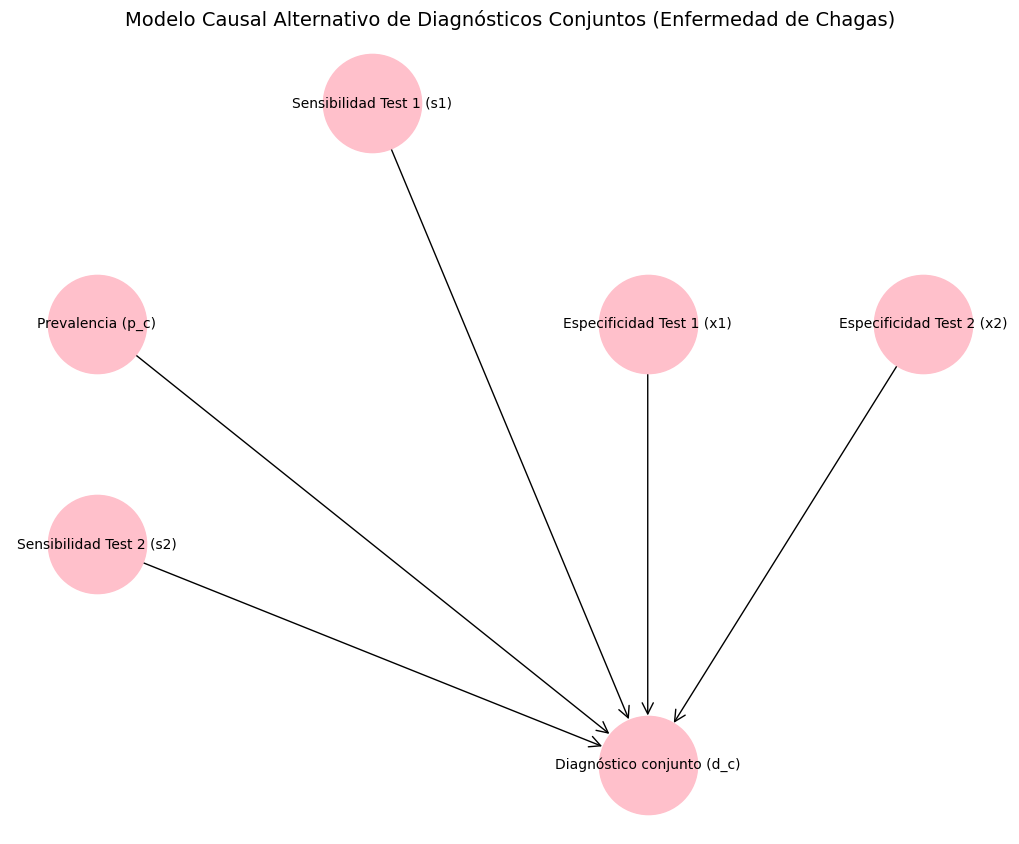

In [ ]:
G_alt = nx.DiGraph()

G_alt.add_nodes_from(["Prevalencia (p_c)", "Sensibilidad Test 1 (s1)", "Especificidad Test 1 (x1)",
                      "Sensibilidad Test 2 (s2)", "Especificidad Test 2 (x2)", "Diagnóstico conjunto (d_c)"])

G_alt.add_edges_from([("Prevalencia (p_c)", "Diagnóstico conjunto (d_c)"),
                      ("Sensibilidad Test 1 (s1)", "Diagnóstico conjunto (d_c)"),
                      ("Especificidad Test 1 (x1)", "Diagnóstico conjunto (d_c)"),
                      ("Sensibilidad Test 2 (s2)", "Diagnóstico conjunto (d_c)"),
                      ("Especificidad Test 2 (x2)", "Diagnóstico conjunto (d_c)")])

pos_alt = {
    "Prevalencia (p_c)": (0, 1),
    "Sensibilidad Test 1 (s1)": (1, 2),
    "Especificidad Test 1 (x1)": (2, 1),
    "Sensibilidad Test 2 (s2)": (0, 0),
    "Especificidad Test 2 (x2)": (3, 1),
    "Diagnóstico conjunto (d_c)": (2, -1)
}

plt.figure(figsize=(10, 8))
nx.draw(G_alt, pos_alt, with_labels=True, node_size=5000, node_color="pink", arrowsize=20, arrowstyle='->', font_size=10)

plt.title("Modelo Causal Alternativo de Diagnósticos Conjuntos (Enfermedad de Chagas)", size=14)
plt.show()

